# Learning from experts

In [1]:
%load_ext autoreload
%autoreload 2

## Question 11
Plot average reward and average training loss for every 250 games during training. Does
the loss decrease? Does the agent learn to play Tic Tac Toe?

In [7]:
import matplotlib.pyplot as plt

def plot_average_stats(players, log_every=250, labels=None):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title(f'Average loss per {log_every} games')
    axes[0].set_xlabel('Game')
    axes[0].set_ylabel('Loss')
    axes[1].set_title(f'Average reward per {log_every} games')
    axes[1].set_xlabel('Game')
    axes[1].set_ylabel('Reward')

    for i, player in enumerate(players):
        if labels is not None:
            label = labels[i]
        else:
            label = None if callable(player.epsilon) else f"eps={player.epsilon}"
        axes[0].plot(list(range(len(player.avg_losses))), player.avg_losses, label=label)
        axes[1].plot(list(range(len(player.avg_rewards))), player.avg_rewards, label=label)

    axes[0].legend()
    axes[1].legend()

    plt.legend()
    plt.show()

### Fixed epsilon

In [ ]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer

suboptimal_player = OptimalPlayer(epsilon=0.5)
q_player_001 = DeepQPlayer(epsilon=0.01, target_update=500, batch_size=64, log_every=250)

play(suboptimal_player, q_player_001, episodes=20000)

In [ ]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer

suboptimal_player = OptimalPlayer(epsilon=0.5)
q_player_01 = DeepQPlayer(epsilon=0.1, target_update=500, batch_size=64, log_every=250)

play(suboptimal_player, q_player_01, episodes=20000)

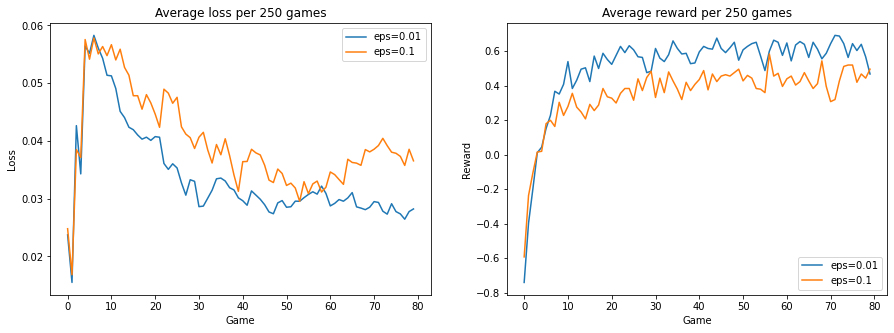

In [14]:
plot_average_stats([q_player_001, q_player_01])

### Arbitrary epsilon

In [2]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer
import random

suboptimal_player = OptimalPlayer(epsilon=0.5)
q_player = DeepQPlayer(epsilon=lambda *args, **kwargs: random.random(), target_update=500, batch_size=64, log_every=250)

play(suboptimal_player, q_player, episodes=20000)

({'wins': 9017, 'losses': 7252, 'M': 0.08825},
 {'wins': 7252, 'losses': 9017, 'M': -0.08825})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


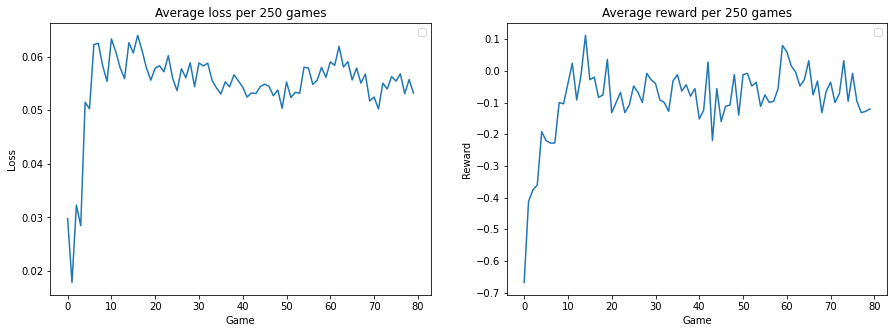

In [5]:
plot_average_stats([q_player])

## Question 12
Repeat the training but without the replay buffer and with a batch size of 1: At every
step, update the network by using only the latest transition. What do you observe?
Expected answer: A figure with two subplots showing average reward and average training loss during
training (caption length < 50 words).
Instead of fixing epsilon, use epsilon(n) in Equation 1. For different values of n∗, run your DQN against Opt(0.5)
for 20’000 games – switch the 1st player after every game. Choose several values of n∗from a reasonably
wide interval between 1 to 40’000 – particularly, include n∗= 1.

In [2]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer
import random

EPS_MIN = 0.1
EPS_MAX = 0.8
n_stars = [1, 100, 1000, 10000, 40000]
star_players = []

for n_star in n_stars:
    suboptimal_player = OptimalPlayer(epsilon=0.5)
    q_player = DeepQPlayer(epsilon=lambda n, n_star=n_star: max(EPS_MIN, EPS_MAX * (1 - n / n_star)), target_update=500, batch_size=1, log_every=250, memory_capacity=1)
    play(suboptimal_player, q_player, episodes=20000)
    star_players.append(q_player)


/Users/mismayil/opt/anaconda3/envs/annproject/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 20000/20000 [03:09<00:00, 105.65it/s]


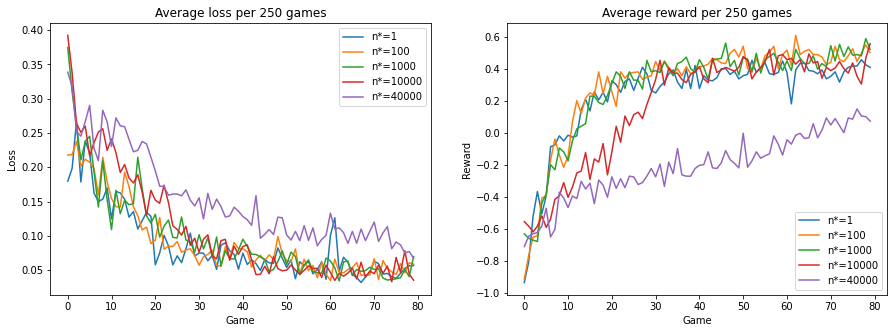

In [8]:
plot_average_stats(star_players, labels=[f"n*={n_star}" for n_star in n_stars])